<a href="https://colab.research.google.com/github/Clinda02/card_spending_analysis/blob/main/Seoul_consumer_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 빅데이터 캠퍼스 데이터 분석
- 데이터 : [서울 시민의 소비 및 이동 패턴 재현 데이터.csv](https://bigdata.seoul.go.kr/data/selectSampleData.do?r_id=P213&sample_data_seq=331&tab_type=&file_id=&sch_text=%EC%84%9C%EC%9A%B8+%EC%8B%9C%EB%AF%BC%EC%9D%98+%EC%86%8C%EB%B9%84&sch_order=U&currentPage=1)
- 설명 : 서울시민 라이프스타일 재현 데이터
  - 서울 시민의 소비 패턴 및 이동 이력 분석을 위한 재현 데이터.
  - 전체 가명정보 결합데이터에서 통신사, 카드사 정보 컬럼을 활용하여 서울 시민의 소비 정보, 이동 정보 분석이 가능한 원본 테이블 구성

## 데이터 가져오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from tqdm import tqdm

# 칼럼 / 행 전체보기
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# 폰트 지정(한글/마이너스 깨짐 방지)
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 데이터 가져오기
file_path = r'C:\Users\user\Desktop\0\취준\99.자료 및 정보\IT강의\교육_새싹EAT-DA\프로젝트\Data\서울빅데이터_카드데이터\금융생활_재현데이터'
df = pd.read_csv(f'{file_path}/서울 시민의 소비 및 이동 패턴 재현 데이터.csv')
display(df.head())

,자치구명,생년월일,성별,동일세대_학령기인구수,동일세대_미취학아동수,직업군,평균_문자대상자수,평균_통화대상자수,평균_통화량,세대주여부,1인가구여부,주택보유여부,대출여부,연체여부,사업자여부,동일세대_세대원_수,추정연소득,추정연소득_백분위,총자산평가금액,순자산평가금액,차량보유,총대출약정금액,주택담보대출약정금액,신용대출약정금액,자동차대출약정금액,카드소비금액,신용카드소비금액,체크카드소비금액,일시불이용금액,할부이용금액,현금서비스이용금액,해외카드이용금액,신용카드기관수,체크카드기관수,카드사_최근1년_월평균_이용금액,가맹점합산이용금액,가맹점분류_이용비중1,가맹점분류_이용비중2,가맹점분류_이용비중3,가맹점분류_이용비중4,가맹점분류_이용비중5,가맹점분류_이용비중6,가맹점분류_이용비중7,가맹점분류_이용비중8,가맹점분류_이용비중9,가맹점분류_이용비중10,가맹점분류_이용비중11,가맹점분류_이용비중12,가맹점분류_이용비중13,가맹점분류_이용비중14,가맹점분류_이용비중15,가맹점분류_이용비중16,가맹점분류_이용비중17,가맹점분류_이용비중18,가맹점분류_이용비중19,배달앱_이용금액,제주도지역_이용금액,해외여행_이용금액,마케팅_슈퍼마켓_이용금액,마케팅_편의점_이용금액,마케팅_온라인쇼핑_이용금액,마케팅_소셜커머스_이용금액,온라인_카드사용_금액,온라인_카드사용_건수,오프라인_카드사용_금액,오프라인_카드사용_건수,주중_소비비중,3개월내_승인건수비중1,3개월내_승인건수비중2,3개월내_승인건수비중3,3개월내_승인건수비중4,3개월내_승인건수비중5,12개월내_월별_이용금액_평균,12개월내_월별_이용금액_표준편차,12개월내_월별_이용금액_최대값,12개월내_월별_이용금액_최소값,12개월내_이용금액_비중1,12개월내_이용금액_비중2,12개월내_이용금액_비중3,12개월내_이용금액_비중4,12개월내_이용금액_비중5,12개월내_이용금액_비중6,12개월내_이용금액_비중7,12개월내_이용금액_비중8,12개월내_이용금액_비중9,12개월내_이용금액_비중10,12개월내_이용금액_비중11,12개월내_이용금액_비중12,3개월내_택시_이용건수,3개월내_대중교통_총이용건수,3개월내_대중교통_이용건수1,3개월내_대중교통_이용건수2,3개월내_탑승정류장수,평일_이동_총횟수,휴일_이동_총횟수,평일_총이동거리,평일_이동속도_평균,휴일_총이동거리,휴일_이동속도_평균,택시이용_이동횟수,네비게이션이용_이동횟수,지하철_이동일수
0,강동구,1978,남,3,0,420,NaN,NaN,NaN,세대주,0,1,0,0,0,6,59000.0,10.0,668310,666380,0,0,0,0,0,7996,7834,162,6296,595,0,87,3,2,1,2834000,0.158095,0.0,0.0,0.000000,0.113481,0.000000,0.003098,0.000000,0.0,0.000000,0.013720,0.000000,0.000000,0.006462,0.0,0.0,0.032664,0.140745,0.531734,130000,0,0,202000,19000,301000,0,1189000,17,2509000,178,0.62,0.00,0.24,0.02,0.21,0.04,2933000,4450832.85,17593000,80000,0.02,0.01,0.08,0.0,0.0,0.03,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,도봉구,1943,남,2,0,420,NaN,NaN,NaN,세대주,0,0,0,0,0,6,26000.0,64.0,516280,520590,0,0,0,0,0,1625,130,1495,1278,0,0,0,1,3,1,1726000,0.532911,0.0,0.0,0.000000,0.068671,0.196519,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.201899,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1648000,53,0.84,0.09,0.23,0.18,0.18,0.00,938000,1017021.09,3789000,168000,0.00,0.00,0.00,0.0,0.0,0.11,0.0,0.04,0.00,0.0,0.00,0.01,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,동작구,1956,남,2,0,420,NaN,NaN,NaN,세대주,0,0,1,0,0,6,24000.0,71.0,831760,762500,0,27600,0,30000,0,249,131,118,145,0,0,0,2,2,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,343000,190645.85,574000,10000,0.04,0.00,0.01,0.0,0.0,0.28,0.0,0.00,0.00,0.0,0.00,0.00,0,41,1,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,동대문구,1979,여,2,0,420,NaN,NaN,NaN,세대주,0,1,1,0,0,6,46000.0,18.0,487500,491610,0,12990,0,5000,0,9078,9078,0,8786,1628,0,273,1,1,4,11210000,0.458368,0.0,0.0,0.030613,0.004050,0.086837,0.002144,0.062775,0.0,0.002382,0.013341,0.053722,0.004527,0.085765,0.0,0.0,0.000000,0.000000,0.195473,169000,0,0,0,0,0,0,3840000,116,10300000,315,0.52,0.26,0.10,0.21,0.15,0.01,3714000,1358077.36,5999000,852000,0.01,0.00,0.24,0.0,0.0,0.26,0.0,0.00,0.02,0.0,0.04,0.01,18,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,서초구,1941,여,0,0,420,28.0,6.0,91.0,세대주,0,1,0,0,0,6,30000.0,51.0,2956000,2956170,0,0,0,0,0,1347,0,1347,1378,0,0,67,1,1,1,1132000,0.426296,0.0,0.0,0.000000,0.182481,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.032531,0.000000,0.358692,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,99000,1,1018000,32,0.72,0.41,0.52,0.00,0.11,0.00,614000,196372.66,683000,156000,0.05,0.00,0.23,0.0,0.0,0.16,0.0,0.09,0.00,0.0,0.00,0.03,0,0,0,0,0,20.0,7.0,310.0,31.0,470.0,39.0,0.0,0.0,9.0


In [ ]:
# 활용 칼럼 64개 선택 (자치구명 제외)
used_columns64 = ['생년월일', '성별', '동일세대_학령기인구수', '동일세대_미취학아동수', '직업군', '1인가구여부', '대출여부', '사업자여부', '추정연소득', '추정연소득_백분위', '총자산평가금액', '차량보유', '신용카드소비금액', '일시불이용금액', '할부이용금액', '해외카드이용금액', '카드사_최근1년_월평균_이용금액', '가맹점합산이용금액', '가맹점분류_이용비중1', '가맹점분류_이용비중2', '가맹점분류_이용비중3', '가맹점분류_이용비중4', '가맹점분류_이용비중5', '가맹점분류_이용비중6', '가맹점분류_이용비중7', '가맹점분류_이용비중8', '가맹점분류_이용비중9', '가맹점분류_이용비중10', '가맹점분류_이용비중11', '가맹점분류_이용비중12', '가맹점분류_이용비중13', '가맹점분류_이용비중14', '가맹점분류_이용비중15', '가맹점분류_이용비중16', '가맹점분류_이용비중17', '가맹점분류_이용비중18', '가맹점분류_이용비중19', '배달앱_이용금액', '해외여행_이용금액', '마케팅_슈퍼마켓_이용금액', '마케팅_편의점_이용금액', '마케팅_온라인쇼핑_이용금액', '마케팅_소셜커머스_이용금액', '온라인_카드사용_금액', '온라인_카드사용_건수', '오프라인_카드사용_금액', '오프라인_카드사용_건수', '12개월내_월별_이용금액_평균', '12개월내_월별_이용금액_최대값', '12개월내_월별_이용금액_최소값', '12개월내_이용금액_비중1', '12개월내_이용금액_비중2', '12개월내_이용금액_비중3', '12개월내_이용금액_비중4', '12개월내_이용금액_비중5', '12개월내_이용금액_비중6', '12개월내_이용금액_비중7', '12개월내_이용금액_비중8', '12개월내_이용금액_비중9', '12개월내_이용금액_비중10', '12개월내_이용금액_비중11', '12개월내_이용금액_비중12', '3개월내_택시_이용건수', '3개월내_대중교통_총이용건수']
used_df = df[used_columns64]
print(len(used_columns64))
display(used_df.head())

64


,생년월일,성별,동일세대_학령기인구수,동일세대_미취학아동수,직업군,1인가구여부,대출여부,사업자여부,추정연소득,추정연소득_백분위,총자산평가금액,차량보유,신용카드소비금액,일시불이용금액,할부이용금액,해외카드이용금액,카드사_최근1년_월평균_이용금액,가맹점합산이용금액,가맹점분류_이용비중1,가맹점분류_이용비중2,가맹점분류_이용비중3,가맹점분류_이용비중4,가맹점분류_이용비중5,가맹점분류_이용비중6,가맹점분류_이용비중7,가맹점분류_이용비중8,가맹점분류_이용비중9,가맹점분류_이용비중10,가맹점분류_이용비중11,가맹점분류_이용비중12,가맹점분류_이용비중13,가맹점분류_이용비중14,가맹점분류_이용비중15,가맹점분류_이용비중16,가맹점분류_이용비중17,가맹점분류_이용비중18,가맹점분류_이용비중19,배달앱_이용금액,해외여행_이용금액,마케팅_슈퍼마켓_이용금액,마케팅_편의점_이용금액,마케팅_온라인쇼핑_이용금액,마케팅_소셜커머스_이용금액,온라인_카드사용_금액,온라인_카드사용_건수,오프라인_카드사용_금액,오프라인_카드사용_건수,12개월내_월별_이용금액_평균,12개월내_월별_이용금액_최대값,12개월내_월별_이용금액_최소값,12개월내_이용금액_비중1,12개월내_이용금액_비중2,12개월내_이용금액_비중3,12개월내_이용금액_비중4,12개월내_이용금액_비중5,12개월내_이용금액_비중6,12개월내_이용금액_비중7,12개월내_이용금액_비중8,12개월내_이용금액_비중9,12개월내_이용금액_비중10,12개월내_이용금액_비중11,12개월내_이용금액_비중12,3개월내_택시_이용건수,3개월내_대중교통_총이용건수
0,1978,남,3,0,420,0,0,0,59000.0,10.0,668310,0,7834,6296,595,87,1,2834000,0.158095,0.0,0.0,0.000000,0.113481,0.000000,0.003098,0.000000,0.0,0.000000,0.013720,0.000000,0.000000,0.006462,0.0,0.0,0.032664,0.140745,0.531734,130000,0,202000,19000,301000,0,1189000,17,2509000,178,2933000,17593000,80000,0.02,0.01,0.08,0.0,0.0,0.03,0.0,0.00,0.00,0.0,0.00,0.00,0,0
1,1943,남,2,0,420,0,0,0,26000.0,64.0,516280,0,130,1278,0,0,1,1726000,0.532911,0.0,0.0,0.000000,0.068671,0.196519,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.201899,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1648000,53,938000,3789000,168000,0.00,0.00,0.00,0.0,0.0,0.11,0.0,0.04,0.00,0.0,0.00,0.01,0,0
2,1956,남,2,0,420,0,1,0,24000.0,71.0,831760,0,131,145,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,343000,574000,10000,0.04,0.00,0.01,0.0,0.0,0.28,0.0,0.00,0.00,0.0,0.00,0.00,0,41
3,1979,여,2,0,420,0,1,0,46000.0,18.0,487500,0,9078,8786,1628,273,4,11210000,0.458368,0.0,0.0,0.030613,0.004050,0.086837,0.002144,0.062775,0.0,0.002382,0.013341,0.053722,0.004527,0.085765,0.0,0.0,0.000000,0.000000,0.195473,169000,0,0,0,0,0,3840000,116,10300000,315,3714000,5999000,852000,0.01,0.00,0.24,0.0,0.0,0.26,0.0,0.00,0.02,0.0,0.04,0.01,18,0
4,1941,여,0,0,420,0,0,0,30000.0,51.0,2956000,0,0,1378,0,67,1,1132000,0.426296,0.0,0.0,0.000000,0.182481,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.032531,0.000000,0.358692,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,99000,1,1018000,32,614000,683000,156000,0.05,0.00,0.23,0.0,0.0,0.16,0.0,0.09,0.00,0.0,0.00,0.03,0,0


In [ ]:
display(used_df.info())
display(used_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   생년월일               1000 non-null   int64  
 1   성별                 1000 non-null   object 
 2   동일세대_학령기인구수        1000 non-null   int64  
 3   동일세대_미취학아동수        1000 non-null   int64  
 4   직업군                1000 non-null   int64  
 5   1인가구여부             1000 non-null   int64  
 6   대출여부               1000 non-null   int64  
 7   사업자여부              1000 non-null   int64  
 8   추정연소득              951 non-null    float64
 9   추정연소득_백분위          951 non-null    float64
 10  총자산평가금액            1000 non-null   int64  
 11  차량보유               1000 non-null   int64  
 12  신용카드소비금액           1000 non-null   int64  
 13  일시불이용금액            1000 non-null   int64  
 14  할부이용금액             1000 non-null   int64  
 15  해외카드이용금액           1000 non-null   int64  
 16  카드사_최근1년_월평균_이용금액  1000 n

None

생년월일                   0
성별                     0
동일세대_학령기인구수            0
동일세대_미취학아동수            0
직업군                    0
1인가구여부                 0
대출여부                   0
사업자여부                  0
추정연소득                 49
추정연소득_백분위             49
총자산평가금액                0
차량보유                   0
신용카드소비금액               0
일시불이용금액                0
할부이용금액                 0
해외카드이용금액               0
카드사_최근1년_월평균_이용금액      0
가맹점합산이용금액              0
가맹점분류_이용비중1          127
가맹점분류_이용비중2          127
가맹점분류_이용비중3          127
가맹점분류_이용비중4          127
가맹점분류_이용비중5          127
가맹점분류_이용비중6          127
가맹점분류_이용비중7          127
가맹점분류_이용비중8          127
가맹점분류_이용비중9          127
가맹점분류_이용비중10         127
가맹점분류_이용비중11         127
가맹점분류_이용비중12         127
가맹점분류_이용비중13         127
가맹점분류_이용비중14         127
가맹점분류_이용비중15         127
가맹점분류_이용비중16         127
가맹점분류_이용비중17         127
가맹점분류_이용비중18         127
가맹점분류_이용비중19         127
배달앱_이용금액               0
해외여행_이용금액              0
마케팅_슈퍼마켓_이용금액          0


In [ ]:
#전처리 필요 -> 데이터 크기가 중요한게 아니기 떄문.
df['직업군'].value_counts()

직업군
420    441
910    282
510    173
440     65
410     19
430     15
520      5
Name: count, dtype: int64

In [ ]:
## 데이터 전처리
# 결측치 제거
used_df = used_df.dropna(axis=0)

used_df['성별'] = used_df['성별'].replace({'남': 0, '여': 1})  # 성별 데이터 변환
used_df['연령'] = [2025 - x for x in used_df['생년월일']] # 연령 칼럼 생성


# # 자치구명 정보 수치 변환
# encoder = LabelEncoder()
# df['자치구명_수치'] = encoder.fit_transform(df['자치구명'])

# 전처리 데이터 확인
display(used_df.info())
display(used_df.isna().sum())
display(used_df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 833 entries, 0 to 999
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   생년월일               833 non-null    int64  
 1   성별                 833 non-null    int64  
 2   동일세대_학령기인구수        833 non-null    int64  
 3   동일세대_미취학아동수        833 non-null    int64  
 4   직업군                833 non-null    int64  
 5   1인가구여부             833 non-null    int64  
 6   대출여부               833 non-null    int64  
 7   사업자여부              833 non-null    int64  
 8   추정연소득              833 non-null    float64
 9   추정연소득_백분위          833 non-null    float64
 10  총자산평가금액            833 non-null    int64  
 11  차량보유               833 non-null    int64  
 12  신용카드소비금액           833 non-null    int64  
 13  일시불이용금액            833 non-null    int64  
 14  할부이용금액             833 non-null    int64  
 15  해외카드이용금액           833 non-null    int64  
 16  카드사_최근1년_월평균_이용금액  833 non-null

None

생년월일                 0
성별                   0
동일세대_학령기인구수          0
동일세대_미취학아동수          0
직업군                  0
1인가구여부               0
대출여부                 0
사업자여부                0
추정연소득                0
추정연소득_백분위            0
총자산평가금액              0
차량보유                 0
신용카드소비금액             0
일시불이용금액              0
할부이용금액               0
해외카드이용금액             0
카드사_최근1년_월평균_이용금액    0
가맹점합산이용금액            0
가맹점분류_이용비중1          0
가맹점분류_이용비중2          0
가맹점분류_이용비중3          0
가맹점분류_이용비중4          0
가맹점분류_이용비중5          0
가맹점분류_이용비중6          0
가맹점분류_이용비중7          0
가맹점분류_이용비중8          0
가맹점분류_이용비중9          0
가맹점분류_이용비중10         0
가맹점분류_이용비중11         0
가맹점분류_이용비중12         0
가맹점분류_이용비중13         0
가맹점분류_이용비중14         0
가맹점분류_이용비중15         0
가맹점분류_이용비중16         0
가맹점분류_이용비중17         0
가맹점분류_이용비중18         0
가맹점분류_이용비중19         0
배달앱_이용금액             0
해외여행_이용금액            0
마케팅_슈퍼마켓_이용금액        0
마케팅_편의점_이용금액         0
마케팅_온라인쇼핑_이용금액       0
마케팅_소셜커머스_이용금액       0
온라인_카드사용_금액

(833, 65)

In [ ]:
# ★ 연령대 분류 기준에 따라 함수 수정 필요

def categorize_age(birth_year):
    if 1998 <= birth_year <= 2003:
        return "19세~24세"
    elif 1988 <= birth_year <= 1997:
        return "25세~34세"
    elif 1978 <= birth_year <= 1987:
        return "35세~44세"
    elif 1968 <= birth_year <= 1977:
        return "45세~54세"
    elif 1958 <= birth_year <= 1967:
        return "55세~64세"
    elif birth_year <= 1957:
        return "65세 이상"
    else:
        return "기타"

# 연령대 컬럼 추가
used_df["연령대"] = used_df["생년월일"].apply(categorize_age)


In [ ]:
df_analysis = used_df.drop(columns=['생년월일']).copy()
df_analysis['성별'].value_counts()

df_analysis.columns

Index(['성별', '동일세대_학령기인구수', '동일세대_미취학아동수', '직업군', '1인가구여부', '대출여부', '사업자여부',
       '추정연소득', '추정연소득_백분위', '총자산평가금액', '차량보유', '신용카드소비금액', '일시불이용금액',
       '할부이용금액', '해외카드이용금액', '카드사_최근1년_월평균_이용금액', '가맹점합산이용금액', '가맹점분류_이용비중1',
       '가맹점분류_이용비중2', '가맹점분류_이용비중3', '가맹점분류_이용비중4', '가맹점분류_이용비중5',
       '가맹점분류_이용비중6', '가맹점분류_이용비중7', '가맹점분류_이용비중8', '가맹점분류_이용비중9',
       '가맹점분류_이용비중10', '가맹점분류_이용비중11', '가맹점분류_이용비중12', '가맹점분류_이용비중13',
       '가맹점분류_이용비중14', '가맹점분류_이용비중15', '가맹점분류_이용비중16', '가맹점분류_이용비중17',
       '가맹점분류_이용비중18', '가맹점분류_이용비중19', '배달앱_이용금액', '해외여행_이용금액',
       '마케팅_슈퍼마켓_이용금액', '마케팅_편의점_이용금액', '마케팅_온라인쇼핑_이용금액', '마케팅_소셜커머스_이용금액',
       '온라인_카드사용_금액', '온라인_카드사용_건수', '오프라인_카드사용_금액', '오프라인_카드사용_건수',
       '12개월내_월별_이용금액_평균', '12개월내_월별_이용금액_최대값', '12개월내_월별_이용금액_최소값',
       '12개월내_이용금액_비중1', '12개월내_이용금액_비중2', '12개월내_이용금액_비중3', '12개월내_이용금액_비중4',
       '12개월내_이용금액_비중5', '12개월내_이용금액_비중6', '12개월내_이용금액_비중7', '12개월내_이용금액_비중8',
       '12개월내_이용금액_비중9', '12개월내_이용금액_비중10', '12개월내_이용금액_비중11',

In [ ]:
df_age = df_analysis['연령'].value_counts().reset_index()
df_age.sort_values('연령', ascending=False)

,연령,count
59,98,1
62,94,1
58,93,1
53,92,2
63,90,1
55,89,2
50,88,4
51,87,4
48,86,6
40,85,10


## 데이터 샘플링

In [ ]:
# 정렬
# 각 그룹별 3%씩 샘플링(★ - 확인필요)
df_sampled = df_analysis.groupby(['성별', '연령', '직업군'], group_keys=False)\
    .apply(lambda x: x.sample(frac=0.03, random_state=42))\
    .sort_values(by=['성별', '연령', '직업군'])\
    .reset_index(drop=True)

# 샘플링된 데이터 확인
display(df_sampled.shape)  # 샘플링된 행 개수 확인
display(df_sampled.head())  # 샘플 데이터 확인

# # 샘플링 데이터 파일 저장
# tqdm.pandas(desc="CSV 저장 중")
# file_path = r'.'
# df_sampled.to_csv(f"{file_path}/sampled_data.csv", index=False)  # CSV 파일로 저장
# # df_sampled.to_parquet("sampled_data.parquet", index=False)  # Parquet 파일 저장 가능

# # 이후 동일한 데이터를 불러와서 사용
# df_sampled = pd.read_csv("sampled_data.csv")  # CSV 불러오기
# tqdm.pandas(desc="CSV 불러오는 중")
# # df_sampled = pd.read_parquet("sampled_data.parquet")  # Parquet 불러오기

(0, 64)

,성별,동일세대_학령기인구수,동일세대_미취학아동수,직업군,1인가구여부,대출여부,사업자여부,추정연소득,추정연소득_백분위,총자산평가금액,차량보유,신용카드소비금액,일시불이용금액,할부이용금액,해외카드이용금액,카드사_최근1년_월평균_이용금액,가맹점합산이용금액,가맹점분류_이용비중1,가맹점분류_이용비중2,가맹점분류_이용비중3,가맹점분류_이용비중4,가맹점분류_이용비중5,가맹점분류_이용비중6,가맹점분류_이용비중7,가맹점분류_이용비중8,가맹점분류_이용비중9,가맹점분류_이용비중10,가맹점분류_이용비중11,가맹점분류_이용비중12,가맹점분류_이용비중13,가맹점분류_이용비중14,가맹점분류_이용비중15,가맹점분류_이용비중16,가맹점분류_이용비중17,가맹점분류_이용비중18,가맹점분류_이용비중19,배달앱_이용금액,해외여행_이용금액,마케팅_슈퍼마켓_이용금액,마케팅_편의점_이용금액,마케팅_온라인쇼핑_이용금액,마케팅_소셜커머스_이용금액,온라인_카드사용_금액,온라인_카드사용_건수,오프라인_카드사용_금액,오프라인_카드사용_건수,12개월내_월별_이용금액_평균,12개월내_월별_이용금액_최대값,12개월내_월별_이용금액_최소값,12개월내_이용금액_비중1,12개월내_이용금액_비중2,12개월내_이용금액_비중3,12개월내_이용금액_비중4,12개월내_이용금액_비중5,12개월내_이용금액_비중6,12개월내_이용금액_비중7,12개월내_이용금액_비중8,12개월내_이용금액_비중9,12개월내_이용금액_비중10,12개월내_이용금액_비중11,12개월내_이용금액_비중12,3개월내_택시_이용건수,3개월내_대중교통_총이용건수,연령


## 이상치 제거

In [ ]:
# IQR 이상치 제거
Q1 = df_analysis.quantile(0.25)
Q3 = df_analysis.quantile(0.75)
IQR = Q3 - Q1

lower_bound= Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR

# 이상치 제거 (★ : 평균값 등 대체필요!)
# df_filtered = df_analysis[~((df_analysis < lower_bound)|(df_analysis > upper_bound).any(axis=1))] 가장 처음 코드
# outliers = df_analysis[(df_analysis < lower_bound) | (df_analysis > upper_bound)].dropna(how='all')
outliers = df_analysis.mask((df_analysis >= lower_bound) & (df_analysis <= upper_bound))
outliers.head(20)

In [ ]:
# 이상치 여부를 새로운 컬럼으로 추가
outliers_flag = (df_analysis < lower_bound) | (df_analysis > upper_bound)
df_outliers = df_analysis[outliers_flag.any(axis=1)]  # 이상치 포함된 행만 필터링

# 이상치 여부 (True/False) 추가
df_outliers['Outlier_Columns'] = outliers_flag.loc[df_outliers.index].apply(lambda row: row[row].index.tolist(), axis=1)

# 결과 확인
df_outliers[['Outlier_Columns']].head()


C:\Users\user\AppData\Local\Temp\ipykernel_13676\4123711165.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['Outlier_Columns'] = outliers_flag.loc[df_outliers.index].apply(lambda row: row[row].index.tolist(), axis=1)


,Outlier_Columns
0,"[해외카드이용금액, 가맹점분류_이용비중17, 가맹점분류_이용비중19, 배달앱_이용금액, 마케팅_온라인쇼핑_이용금액, 12개월내_월별_이용금액_최대값]"
1,[가맹점분류_이용비중6]
3,"[성별, 할부이용금액, 해외카드이용금액, 가맹점합산이용금액, 가맹점분류_이용비중6, 가맹점분류_이용비중8, 가맹점분류_이용비중10, 가맹점분류_이용비중13, 배달앱_이용금액, 온라인_카드사용_금액, 온라인_카드사용_건수, 오프라인_카드사용_금액, 오프라인_카드사용_건수, 12개월내_이용금액_비중9, 3개월내_택시_이용건수]"
4,"[성별, 총자산평가금액, 해외카드이용금액]"
5,"[추정연소득, 할부이용금액, 해외카드이용금액, 가맹점분류_이용비중2, 가맹점분류_이용비중10, 가맹점분류_이용비중17, 가맹점분류_이용비중19, 마케팅_온라인쇼핑_이용금액, 12개월내_월별_이용금액_최대값]"


In [ ]:
outliers_count = ((df_analysis < lower_bound) | (df_analysis > upper_bound)).sum()
print(outliers_count)


성별                   128
동일세대_학령기인구수            0
동일세대_미취학아동수           27
직업군                  187
1인가구여부                 0
대출여부                   0
사업자여부                126
추정연소득                 56
추정연소득_백분위              0
총자산평가금액               49
차량보유                 119
신용카드소비금액              49
일시불이용금액               50
할부이용금액               142
해외카드이용금액             110
카드사_최근1년_월평균_이용금액     24
가맹점합산이용금액             61
가맹점분류_이용비중1           14
가맹점분류_이용비중2           68
가맹점분류_이용비중3          198
가맹점분류_이용비중4          112
가맹점분류_이용비중5           43
가맹점분류_이용비중6          207
가맹점분류_이용비중7          119
가맹점분류_이용비중8          130
가맹점분류_이용비중9           28
가맹점분류_이용비중10         179
가맹점분류_이용비중11         121
가맹점분류_이용비중12          83
가맹점분류_이용비중13         187
가맹점분류_이용비중14          72
가맹점분류_이용비중15         131
가맹점분류_이용비중16          11
가맹점분류_이용비중17         164
가맹점분류_이용비중18          63
가맹점분류_이용비중19          88
배달앱_이용금액             135
해외여행_이용금액             33
마케팅_슈퍼마켓_이용금액         90
마케팅_편의점_이용금액         132


In [ ]:
df_filtered = df_analysis[~((df_analysis < lower_bound)|(df_analysis > upper_bound).any(axis=1))]
outliers = df_analysis.mask((df_analysis >= lower_bound) & (df_analysis <= upper_bound))
outlier_mask = (df_analysis < lower_bound) | (df_analysis > upper_bound)
outlier_rows = outlier_mask.any(axis=1)

# 이상치가 포함된 행 개수 확인
display(outlier_rows.sum())  # True 개수 확인 (이상치가 있는 행 개수)
display(outlier_rows.head()) # 일부 확인

820

0    True
1    True
3    True
4    True
5    True
dtype: bool

In [ ]:
# 이상치 행 필터링 적용
df_filtered = df_analysis[~outlier_rows]

# 이상치가 잘 제거되었는지 확인
print(f"이상치 제거 전: {df_analysis.shape}")
print(f"이상치 제거 후: {df_filtered.shape}")


이상치 제거 전: (833, 64)
이상치 제거 후: (13, 64)


In [ ]:
# 특정 칼럼에서 IQR이 너무 작거나 큰 경우 확인
iqr_check = IQR.describe()
print(iqr_check)


count    6.400000e+01
mean     2.465245e+05
std      8.615684e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.150000e-01
75%      2.875000e+01
max      5.248000e+06
dtype: float64


In [ ]:
display(IQR.describe())  # IQR 값의 분포 확인
print("============")
display(lower_bound.describe())  # 하한값 분포 확인
print("============")
display(upper_bound.describe())  # 상한값 분포 확인

count    6.400000e+01
mean     2.465245e+05
std      8.615684e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.150000e-01
75%      2.875000e+01
max      5.248000e+06
dtype: float64

count    6.400000e+01
mean    -3.152401e+05
std      1.093778e+06
min     -6.584000e+06
25%     -3.300000e+01
50%     -9.009728e-02
75%      0.000000e+00
max      2.850000e+02
dtype: float64

count    6.400000e+01
mean     6.708579e+05
std      2.353829e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.875000e-01
75%      1.095000e+02
max      1.440800e+07
dtype: float64

## 이상치 대체
- Clipping : 최대/최소값
- median : 중앙값
- mean : 평균값

In [ ]:
# IQR 범위 내 최대/최소값(Clipping) 대체
df_imputed_clip = df_analysis.copy()

# 이상치 값을 IQR 범위 내 최대/최소값으로 조정 (Clipping)
for col in df_analysis.columns:
    df_imputed_clip[col] = df_imputed_clip[col].clip(lower=lower_bound[col], upper=upper_bound[col])

print(f"이상치 대체 후 데이터 개수: {df_imputed_clip.shape}")

In [ ]:
# 중앙값(median) 이상치 대체
df_imputed_median = df_analysis.copy()  # 원본 데이터 유지

# 각 칼럼의 중앙값을 활용하여 이상치 대체
for col in df_analysis.columns:
    median_value = df_analysis[col].median()
    df_imputed_median[col] = df_analysis[col].mask((df_analysis[col] < lower_bound[col]) |
                                                   (df_analysis[col] > upper_bound[col]), median_value)

print(f"이상치 중앙값 대체 후 데이터 개수: {df_imputed_median.shape}")


In [ ]:
# 평균(mean) 이상치 대체
df_imputed_mean = df_analysis.copy()  # 원본 데이터 유지

# 각 칼럼의 평균값을 활용하여 이상치 대체
for col in df_analysis.columns:
    mean_value = df_analysis[col].mean()
    df_imputed_mean[col] = df_analysis[col].mask((df_analysis[col] < lower_bound[col]) |
                                                 (df_analysis[col] > upper_bound[col]), mean_value)

print(f"이상치 평균값 대체 후 데이터 개수: {df_imputed_mean.shape}")


## 표준화

In [ ]:
# 데이터 표준화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)

# K-Means 클러스터링
- IQR 이상치 제거
- 데이터 표준화 StandardScaler()
- elbow 기법 (K값 최적화)
- K-Means 분석

## elbow 기법

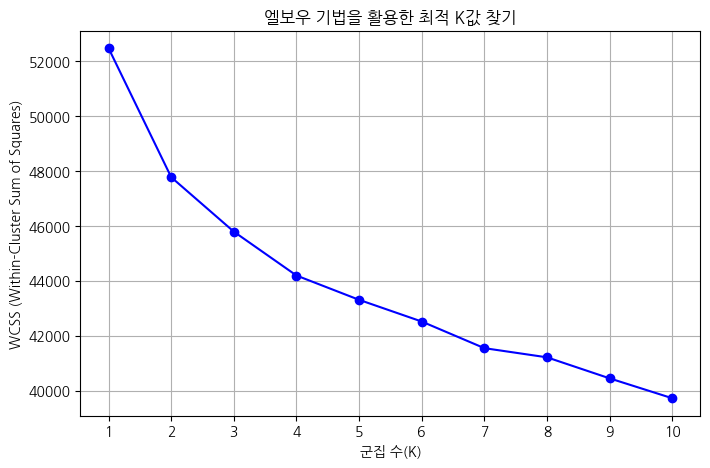

In [ ]:
#엘보우기법 실행
wcss = []
K = range(1, 11) #1~10개의 군집을 테스트
for k in K :
	kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
	kmeans.fit(df_scaled)
	wcss.append(kmeans.inertia_)

#그래프그리기
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('군집 수(K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('엘보우 기법을 활용한 최적 K값 찾기')
plt.xticks(K)
plt.grid()
plt.show()


In [ ]:
df_filtered.shape

(833, 64)

## K-Means 분석

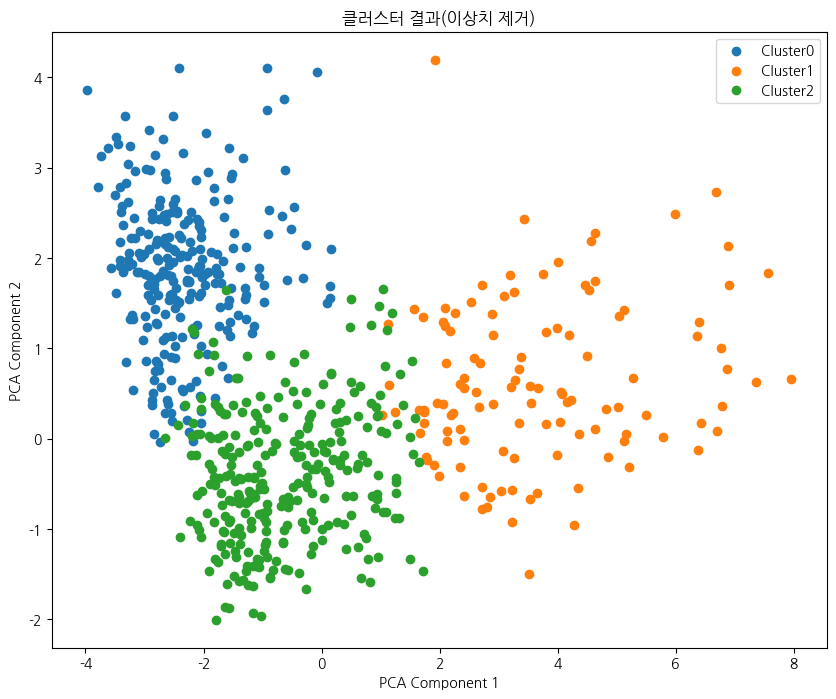

In [ ]:
## 클러스터링
# array > dataframe 변환
df_scaled = pd.DataFrame(df_scaled, columns=df_filtered.columns)

optimal_k = 7  # 엘보우 기법 결과로 선택한 K

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans_final.fit_predict(df_scaled)

# 차원축소 후 사점도 출력
pca = PCA(n_components=2)
reduced_filtered_df = pca.fit_transform(df_scaled)
df_scaled['PCA1'] = reduced_filtered_df[:,0]
df_scaled['PCA2'] = reduced_filtered_df[:,1]

# 클러스터링 결과 시각화
plt.figure(figsize=(10,8))
for cluster in range(3):
	cluster_data = df_scaled[df_scaled['Cluster']== cluster]
	plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster{cluster}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('클러스터 결과(이상치 제거)')
# plt.title('Clustering Result (After Outlier Removal & Standardization)')
plt.legend()
plt.show()

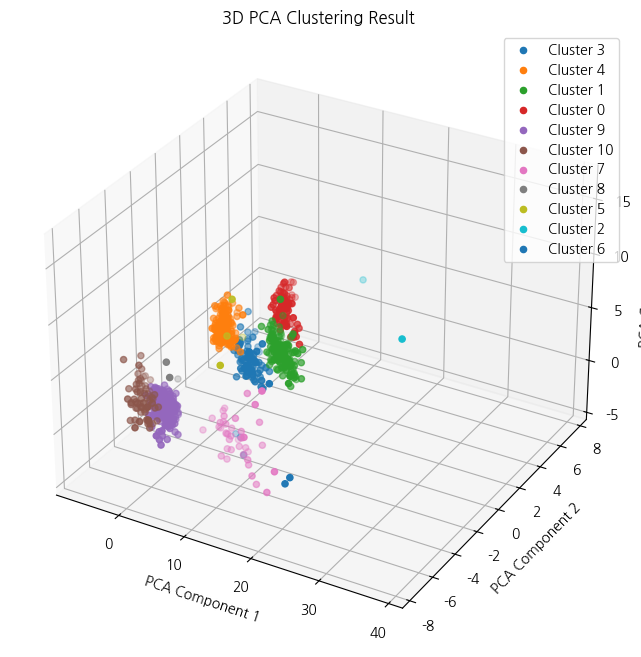

In [ ]:
# PCA 3D 시각화
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
reduced_filtered_df_3d = pca_3d.fit_transform(df_scaled.drop(columns=['Cluster']))

df_scaled['PCA1'] = reduced_filtered_df_3d[:, 0]
df_scaled['PCA2'] = reduced_filtered_df_3d[:, 1]
df_scaled['PCA3'] = reduced_filtered_df_3d[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in df_scaled['Cluster'].unique():
    cluster_data = df_scaled[df_scaled['Cluster'] == cluster]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label=f'Cluster {cluster}')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D PCA Clustering Result')
ax.legend()
plt.show()


In [ ]:
# 클러스터 출력
print("클러스터 개수:", df_scaled['Cluster'].nunique())
print("클러스터별 샘플 개수:\n", df_scaled['Cluster'].value_counts())

print("Silhouette Score:", silhouette_score(df_scaled.drop(columns=['Cluster']), df_scaled['Cluster']))

클러스터 개수: 7
클러스터별 샘플 개수:
 Cluster
2    292
0    249
4    151
1    116
3     19
5      4
6      2
Name: count, dtype: int64
Silhouette Score: 0.07202309170614536


In [ ]:
# 원본 데이터에 클러스터 번호 추가
df_scaled['Cluster'] = df_scaled['Cluster'].values

# 클러스터링 결과 확인
df_scaled.head()

,생년월일,성별,동일세대_학령기인구수,동일세대_미취학아동수,직업군,1인가구여부,대출여부,사업자여부,추정연소득,추정연소득_백분위,총자산평가금액,차량보유,신용카드소비금액,일시불이용금액,할부이용금액,해외카드이용금액,카드사_최근1년_월평균_이용금액,가맹점합산이용금액,가맹점분류_이용비중1,가맹점분류_이용비중2,가맹점분류_이용비중3,가맹점분류_이용비중4,가맹점분류_이용비중5,가맹점분류_이용비중6,가맹점분류_이용비중7,가맹점분류_이용비중8,가맹점분류_이용비중9,가맹점분류_이용비중10,가맹점분류_이용비중11,가맹점분류_이용비중12,가맹점분류_이용비중13,가맹점분류_이용비중14,가맹점분류_이용비중15,가맹점분류_이용비중16,가맹점분류_이용비중17,가맹점분류_이용비중18,가맹점분류_이용비중19,배달앱_이용금액,해외여행_이용금액,마케팅_슈퍼마켓_이용금액,마케팅_편의점_이용금액,마케팅_온라인쇼핑_이용금액,마케팅_소셜커머스_이용금액,온라인_카드사용_금액,온라인_카드사용_건수,오프라인_카드사용_금액,오프라인_카드사용_건수,12개월내_월별_이용금액_평균,12개월내_월별_이용금액_최대값,12개월내_월별_이용금액_최소값,12개월내_이용금액_비중1,12개월내_이용금액_비중2,12개월내_이용금액_비중3,12개월내_이용금액_비중4,12개월내_이용금액_비중5,12개월내_이용금액_비중6,12개월내_이용금액_비중7,12개월내_이용금액_비중8,12개월내_이용금액_비중9,12개월내_이용금액_비중10,12개월내_이용금액_비중11,12개월내_이용금액_비중12,3개월내_택시_이용건수,3개월내_대중교통_총이용건수,Cluster,PCA1,PCA2
0,0.979963,-0.426099,1.559369,-0.581410,-0.651647,0.0,-1.081328,-0.422159,0.312331,-0.895695,0.007360,-0.382525,0.514682,0.415077,-0.023116,-0.031834,-0.634842,-0.062045,-0.125139,-0.176704,-0.263171,-0.462469,-0.341728,-0.301248,-0.389382,-0.244154,-0.13174,-0.198352,0.102713,-0.617847,-0.337801,-0.657318,-0.150494,-0.098969,0.398347,0.342525,2.343400,0.373693,-0.095485,0.731271,-0.287318,1.357484,-0.240898,-0.065760,-0.164359,-0.031022,1.348275,0.274279,1.083200,-0.443916,-0.439558,-0.162579,-0.070589,-0.076357,-0.122194,-0.742842,-0.162591,-0.502163,-0.206031,-0.178372,-0.540254,-0.364762,-0.328208,-0.439379,4,1.257908,-2.831080
1,-1.542178,-0.426099,0.663538,-0.581410,-0.651647,0.0,-1.081328,-0.422159,-0.718476,1.262551,-0.249354,-0.382525,-0.614059,-0.481335,-0.377663,-0.144742,-0.634842,-0.368555,2.015176,-0.176704,-0.263171,-0.462469,-0.571546,5.560233,-0.432980,-0.244154,-0.13174,-0.198352,-0.232575,-0.617847,-0.337801,0.406336,-0.150494,-0.098969,-0.273793,-0.588477,-0.536587,-0.231895,-0.095485,-0.484258,-0.455167,-0.253198,-0.240898,-0.327378,-0.544170,-0.243567,-0.279765,-0.399831,-0.286164,-0.387363,-0.668977,-0.348351,-0.584690,-0.076357,-0.122194,-0.267309,-0.162591,0.109837,-0.206031,-0.178372,-0.540254,-0.220280,-0.328208,-0.439379,0,-2.194222,2.077457
2,1.052024,2.346873,0.663538,-0.581410,-0.651647,0.0,0.924789,-0.422159,-0.093745,-0.575954,-0.297951,-0.382525,0.696945,0.859888,0.592425,0.209555,1.042187,2.255038,1.589511,-0.176704,-0.263171,-0.180527,-0.902963,2.288811,-0.402807,2.062756,-0.13174,-0.154788,0.093447,-0.361059,-0.288258,-0.225714,-0.150494,-0.098969,-0.273793,-0.588477,0.522139,0.555369,-0.095485,-0.484258,-0.455167,-0.253198,-0.240898,0.517545,2.047482,1.892253,3.132608,0.538179,-0.066930,0.052206,-0.554267,-0.348351,0.957614,-0.076357,-0.122194,0.624316,-0.162591,-0.502163,0.788889,-0.178372,-0.314844,-0.220280,2.466311,-0.439379,1,3.994156,-0.176802
3,-1.686300,2.346873,-1.128123,-0.581410,-0.651647,0.0,-1.081328,-0.422159,-0.593530,0.742974,3.870292,-0.382525,-0.633106,-0.463471,-0.377663,-0.057790,-0.634842,-0.532875,1.406371,-0.176704,-0.263171,-0.462469,0.012143,-0.301248,-0.432980,-0.244154,-0.13174,-0.198352,-0.232575,-0.462350,-0.337801,1.259674,-0.150494,-0.098969,-0.273793,-0.588477,-0.536587,-0.231895,-0.095485,-0.484258,-0.455167,-0.253198,-0.240898,-0.305595,-0.521828,-0.399088,-0.553276,-0.509311,-0.594280,-0.395075,-0.095430,-0.348351,0.893352,-0.076357,-0.122194,0.029899,-0.162591,0.874836,-0.206031,-0.178372,-0.540254,0.068686,-0.328208,-0.439379,0,-2.578711,2.231788
4,2.349125,-0.426099,-1.128123,0.673291,-0.651647,0.0,0.924789,-0.422159,1.999106,-1.215435,0.989586,-0.382525,0.216087,-0.002582,0.523899,-0.024047,1.601197,0.178626,1.170153,0.571796,-0.263171,-0.122991,-0.498207,-0.301248,-0.266456,-0.244154,-0.13174,0.699532,-0.232575,-0.617847,-0.324403,-0.310509,-0.150494,-0.098969,-0.170233,-0.588477,1.328000,-0.231895,-0.095485,-0.484258,-0.013458,-0.092665,-0.240898,-0.117688,-0.142017,0.054144,0.410524,0.760179,3.640193,-0.281969,-0.668977,-0.348351,0.700564,-0.076357,-0.122194,-0.148426,-0.162591,-0.502163,-0.206031,-0.178372,-0.371196,-0.364762,-0.328208,-0.439379,4,2.764847,-2.962561


In [ ]:
df_scaled['Cluster'].value_counts()

Cluster
2    292
0    249
4    151
1    116
3     19
5      4
6      2
Name: count, dtype: int64

---

In [ ]:
clustered_df = df_scaled.groupby('Cluster').agg(
  {'생년월일' : 'mean', '성별' : 'mean', '동일세대_학령기인구수' : 'mean', '동일세대_미취학아동수' : 'mean', '직업군' : 'mean', '1인가구여부' : 'mean', '대출여부' : 'mean', '사업자여부' : 'mean', '추정연소득' : 'mean',
   '추정연소득_백분위' : 'mean', '총자산평가금액' : 'mean', '차량보유' : 'mean', '신용카드소비금액' : 'mean', '일시불이용금액' : 'mean', '할부이용금액' : 'mean', '해외카드이용금액' : 'mean', '카드사_최근1년_월평균_이용금액' : 'mean', '가맹점합산이용금액' : 'mean', '가맹점분류_이용비중1' : 'mean', '가맹점분류_이용비중2' : 'mean',
   '가맹점분류_이용비중3' : 'mean', '가맹점분류_이용비중4' : 'mean', '가맹점분류_이용비중5' : 'mean', '가맹점분류_이용비중6' : 'mean', '가맹점분류_이용비중7' : 'mean', '가맹점분류_이용비중8' : 'mean', '가맹점분류_이용비중9' : 'mean', '가맹점분류_이용비중10' : 'mean', '가맹점분류_이용비중11' : 'mean', '가맹점분류_이용비중12' : 'mean',
   '가맹점분류_이용비중13' : 'mean', '가맹점분류_이용비중14' : 'mean', '가맹점분류_이용비중15' : 'mean', '가맹점분류_이용비중16' : 'mean', '가맹점분류_이용비중17' : 'mean', '가맹점분류_이용비중18' : 'mean', '가맹점분류_이용비중19' : 'mean', '배달앱_이용금액' : 'mean', '해외여행_이용금액' : 'mean', '마케팅_슈퍼마켓_이용금액' : 'mean',
   '마케팅_편의점_이용금액' : 'mean', '마케팅_온라인쇼핑_이용금액' : 'mean', '마케팅_소셜커머스_이용금액' : 'mean', '온라인_카드사용_금액' : 'mean', '온라인_카드사용_건수' : 'mean',
   '오프라인_카드사용_금액' : 'mean', '오프라인_카드사용_건수' : 'mean', '12개월내_월별_이용금액_평균' : 'mean', '12개월내_월별_이용금액_최대값' : 'mean',  '12개월내_월별_이용금액_최소값' : 'mean', '12개월내_이용금액_비중1' : 'mean', '12개월내_이용금액_비중2' : 'mean', '12개월내_이용금액_비중3' : 'mean', '12개월내_이용금액_비중4' : 'mean', '12개월내_이용금액_비중5' : 'mean', '12개월내_이용금액_비중6' : 'mean', '12개월내_이용금액_비중7' : 'mean',
   '12개월내_이용금액_비중8' : 'mean', '12개월내_이용금액_비중9' : 'mean', '12개월내_이용금액_비중10' : 'mean', '12개월내_이용금액_비중11' : 'mean', '12개월내_이용금액_비중12' : 'mean', '3개월내_택시_이용건수' : 'mean', '3개월내_대중교통_총이용건수' : 'mean'
  })

clustered_df

,생년월일,성별,동일세대_학령기인구수,동일세대_미취학아동수,직업군,1인가구여부,대출여부,사업자여부,추정연소득,추정연소득_백분위,총자산평가금액,차량보유,신용카드소비금액,일시불이용금액,할부이용금액,해외카드이용금액,카드사_최근1년_월평균_이용금액,가맹점합산이용금액,가맹점분류_이용비중1,가맹점분류_이용비중2,가맹점분류_이용비중3,가맹점분류_이용비중4,가맹점분류_이용비중5,가맹점분류_이용비중6,가맹점분류_이용비중7,가맹점분류_이용비중8,가맹점분류_이용비중9,가맹점분류_이용비중10,가맹점분류_이용비중11,가맹점분류_이용비중12,가맹점분류_이용비중13,가맹점분류_이용비중14,가맹점분류_이용비중15,가맹점분류_이용비중16,가맹점분류_이용비중17,가맹점분류_이용비중18,가맹점분류_이용비중19,배달앱_이용금액,해외여행_이용금액,마케팅_슈퍼마켓_이용금액,마케팅_편의점_이용금액,마케팅_온라인쇼핑_이용금액,마케팅_소셜커머스_이용금액,온라인_카드사용_금액,온라인_카드사용_건수,오프라인_카드사용_금액,오프라인_카드사용_건수,12개월내_월별_이용금액_평균,12개월내_월별_이용금액_최대값,12개월내_월별_이용금액_최소값,12개월내_이용금액_비중1,12개월내_이용금액_비중2,12개월내_이용금액_비중3,12개월내_이용금액_비중4,12개월내_이용금액_비중5,12개월내_이용금액_비중6,12개월내_이용금액_비중7,12개월내_이용금액_비중8,12개월내_이용금액_비중9,12개월내_이용금액_비중10,12개월내_이용금액_비중11,12개월내_이용금액_비중12,3개월내_택시_이용건수,3개월내_대중교통_총이용건수
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.999838,-0.080869,-0.189120,-0.072475,0.444767,0.0,-0.509303,-0.242821,-0.533968,0.829811,0.183567,-0.270119,-0.446887,-0.492181,-0.217274,-0.135178,-0.497895,-0.540583,-0.284904,-0.040026,-0.010018,0.093220,-0.062837,-0.059350,-0.229399,-0.211004,-0.127738,0.015591,-0.008478,0.238766,-0.319357,0.674622,0.021174,-0.034857,-0.114375,0.158741,-0.465531,-0.226993,-0.092123,-0.258011,-0.387793,-0.229515,-0.235935,-0.247167,-0.380330,-0.394654,-0.590675,-0.467459,-0.398420,-0.359972,0.218753,-0.223757,-0.309832,0.041540,-0.062239,-0.236514,-0.113143,0.203234,-0.154087,0.005723,0.019424,0.278156,-0.239671,-0.210544
1,0.451307,0.004190,0.061170,-0.062223,-0.184265,0.0,0.371377,0.516174,0.562385,-0.628326,0.064790,0.118603,1.150896,0.947714,0.660026,-0.043089,1.177120,1.335732,-0.031392,0.084334,0.262783,-0.029259,-0.207290,0.206934,0.158755,0.393835,0.024520,0.012162,0.034392,-0.076931,0.390744,-0.203159,0.036650,-0.098969,0.008833,-0.128429,0.172594,0.404856,-0.044772,0.536066,0.588713,0.865367,0.600042,0.427311,0.965637,0.958945,1.148532,1.027186,0.865514,0.910720,-0.222006,-0.080903,0.069016,0.050179,-0.098795,0.083704,0.113380,-0.180335,0.235679,-0.178372,0.086425,-0.220280,0.555117,0.199134
2,0.201850,-0.122212,-0.020606,-0.104452,-0.228765,0.0,0.189670,0.027068,0.011686,-0.216110,-0.114443,0.008258,-0.264592,-0.225356,-0.174187,-0.105870,-0.284503,-0.244586,0.508529,-0.034642,-0.122386,-0.009788,0.403048,-0.072611,0.111589,0.088441,0.109728,0.010181,0.007238,-0.144375,-0.291191,-0.289851,-0.032589,-0.037089,0.098975,0.006744,-0.329487,-0.145795,-0.087926,0.029081,0.144105,-0.178960,-0.198867,-0.200946,-0.265968,-0.184836,0.006815,-0.252999,-0.232020,-0.187602,0.014172,0.320938,-0.267338,-0.076357,0.031185,0.250973,0.056674,0.056391,0.001812,0.032746,-0.078819,-0.180201,-0.155411,0.074226
3,0.445193,0.157685,-0.232292,0.277069,-0.254292,0.0,0.608033,0.459190,1.781141,-0.824174,1.249794,1.203892,3.332208,4.213286,1.645654,0.737618,4.131450,3.217926,-0.518676,-0.010503,0.607886,-0.063159,-0.390841,0.993637,0.976478,-0.046697,0.417617,-0.040164,0.188373,-0.071253,-0.012799,0.174152,-0.034843,-0.098969,0.164441,-0.081143,0.048807,1.899921,0.129377,1.510059,0.994103,0.755908,1.711659,2.867810,2.828270,2.913792,2.084492,3.873551,2.943011,2.539075,-0.089393,-0.182134,-0.097647,0.181155,1.520697,-0.088984,0.226227,-0.220321,0.029608,0.403984,0.325796,0.760681,2.262034,0.893115
4,0.838226,0.308463,0.343175,0.340920,-0.115088,0.0,0.127656,-0.163396,0.133666,-0.361559,-0.297034,0.102255,-0.112853,-0.089203,-0.022311,-0.066316,-0.127661,-0.111181,-0.418741,0.037156,-0.015295,-0.105122,-0.478971,-0.103504,-0.100549,-0.134668,-0.067697,-0.049787,-0.042490,-0.036477,0.804393,-0.406458,0.008286,0.221616,-0.084161,-0.154541,1.265008,0.093944,-0.065209,-0.284207,-0.296737,-0.031535,0.091496,-0.061021,0.015116,-0.192330,-0.202654,-0.119030,-0.026726,-0.169404,-0.186590,-0.168730,0.989958,0.020849,-0.077255,-0.146851,-0.032127,-0.279249,0.064113,0.010053,-0.014048,-0.190618,-0.049578,-0.047052
5,0.403473,1.653630,-0.232292,0.045940,0.222401,0.0,-0.078270,1.671044,-0.249928,0.533144,-0.262778,3.385215,-0.412200,0.79

In [ ]:
df_scaled[df_scaled['Cluster'] == 6]

,생년월일,성별,동일세대_학령기인구수,동일세대_미취학아동수,직업군,1인가구여부,대출여부,사업자여부,추정연소득,추정연소득_백분위,총자산평가금액,차량보유,신용카드소비금액,일시불이용금액,할부이용금액,해외카드이용금액,카드사_최근1년_월평균_이용금액,가맹점합산이용금액,가맹점분류_이용비중1,가맹점분류_이용비중2,가맹점분류_이용비중3,가맹점분류_이용비중4,가맹점분류_이용비중5,가맹점분류_이용비중6,가맹점분류_이용비중7,가맹점분류_이용비중8,가맹점분류_이용비중9,가맹점분류_이용비중10,가맹점분류_이용비중11,가맹점분류_이용비중12,가맹점분류_이용비중13,가맹점분류_이용비중14,가맹점분류_이용비중15,가맹점분류_이용비중16,가맹점분류_이용비중17,가맹점분류_이용비중18,가맹점분류_이용비중19,배달앱_이용금액,해외여행_이용금액,마케팅_슈퍼마켓_이용금액,마케팅_편의점_이용금액,마케팅_온라인쇼핑_이용금액,마케팅_소셜커머스_이용금액,온라인_카드사용_금액,온라인_카드사용_건수,오프라인_카드사용_금액,오프라인_카드사용_건수,12개월내_월별_이용금액_평균,12개월내_월별_이용금액_최대값,12개월내_월별_이용금액_최소값,12개월내_이용금액_비중1,12개월내_이용금액_비중2,12개월내_이용금액_비중3,12개월내_이용금액_비중4,12개월내_이용금액_비중5,12개월내_이용금액_비중6,12개월내_이용금액_비중7,12개월내_이용금액_비중8,12개월내_이용금액_비중9,12개월내_이용금액_비중10,12개월내_이용금액_비중11,12개월내_이용금액_비중12,3개월내_택시_이용건수,3개월내_대중교통_총이용건수,Cluster,PCA1,PCA2
36,0.979963,-0.426099,-0.232292,-0.58141,-0.550308,0.0,-1.081328,2.368778,7.785059,-1.255402,1.320547,-0.382525,9.113712,5.506117,0.880830,11.034413,4.955254,5.41364,-0.299204,-0.176704,-0.263171,-0.008180,-0.311949,4.516641,1.106096,0.120338,-0.13174,-0.198352,-0.068103,-0.453183,-0.309692,0.175065,0.130459,-0.098969,-0.253748,-0.588477,0.555577,1.794495,14.520874,2.753142,3.529047,0.073220,1.512386,13.298542,2.695395,11.400500,1.973443,7.261707,5.905635,9.100653,-0.324849,-0.162579,0.636301,-0.076357,1.234977,0.445991,-0.162591,0.721836,0.291429,-0.178372,0.530444,12.34971,4.018822,-0.376557,6,27.923825,7.423542
256,0.043167,-0.426099,-0.232292,-0.58141,-0.702316,0.0,-1.081328,-0.422159,3.498462,-1.255402,1.030247,-0.382525,1.295746,3.156475,-0.011795,10.907229,4.955254,3.23515,-0.577863,5.546053,-0.263171,-0.021074,-0.306502,1.566172,-0.362324,1.880527,-0.13174,0.164725,-0.156354,0.024321,-0.337801,0.352115,-0.133077,-0.098969,-0.234657,0.378708,-0.401027,0.979281,14.520874,6.122926,-0.419830,-0.253198,0.261660,12.819312,3.030522,4.768401,1.673883,7.261707,5.905635,7.891837,-0.210140,0.394738,0.250725,-0.076357,-0.122194,-0.326751,-0.162591,-0.043163,0.291429,-0.178372,0.305034,12.34971,1.379554,-0.439379,6,20.522455,6.638763


In [ ]:
# GPT 코드
# 군집별 평균과 표준편차 계산
cluster_summary = df_scaled.groupby('Cluster').agg(['mean', 'std'])

# 결과 확인
display(cluster_summary.T.head())  # Transpose 해서 보기 좋게 표시
display(cluster_summary.T.tail())

Cluster                  0         1         2         3         4         5  \
생년월일        mean -0.999838  0.451307  0.201850  0.445193  0.838226  0.403473   
            std   0.710223  0.715767  0.780697  0.768020  0.655845  0.436352   
성별          mean -0.080869  0.004190 -0.122212  0.157685  0.308463  1.653630   
            std   0.917337  1.008363  0.867699  1.161470  1.227730  1.386486   
동일세대_학령기인구수 mean -0.189120  0.061170 -0.020606 -0.232292  0.343175 -0.232292   

Cluster                  6  
생년월일        mean  0.511565  
            std   0.662414  
성별          mean -0.426099  
            std   0.000000  
동일세대_학령기인구수 mean -0.232292

Cluster                      0         1         2          3         4  \
3개월내_대중교통_총이용건수 std   0.574962  1.218632  1.105076   1.762411  0.949965   
PCA1            mean -2.326055  3.641040 -0.635259  11.755791  0.378724   
                std   0.791097  1.639199  1.035160   2.868801  1.219247   
PCA2            mean  1.864459  0.614053 -0.398561   1.925938 -3.071145   
                std   0.836468  0.903427  0.745242   1.691825  0.892389   

Cluster                      5          6  
3개월내_대중교통_총이용건수 std   0.104474   0.044422  
PCA1            mean  3.332258  24.223140  
                std   1.119742   5.233559  
PCA2            mean -1.503211   7.031152  
                std   0.762686   0.554923

In [ ]:
df_filtered['Cluster'] = df_scaled['Cluster'].values

In [ ]:
df_filtered.head()

,생년월일,성별,동일세대_학령기인구수,동일세대_미취학아동수,직업군,1인가구여부,대출여부,사업자여부,추정연소득,추정연소득_백분위,총자산평가금액,차량보유,신용카드소비금액,일시불이용금액,할부이용금액,해외카드이용금액,카드사_최근1년_월평균_이용금액,가맹점합산이용금액,가맹점분류_이용비중1,가맹점분류_이용비중2,가맹점분류_이용비중3,가맹점분류_이용비중4,가맹점분류_이용비중5,가맹점분류_이용비중6,가맹점분류_이용비중7,가맹점분류_이용비중8,가맹점분류_이용비중9,가맹점분류_이용비중10,가맹점분류_이용비중11,가맹점분류_이용비중12,가맹점분류_이용비중13,가맹점분류_이용비중14,가맹점분류_이용비중15,가맹점분류_이용비중16,가맹점분류_이용비중17,가맹점분류_이용비중18,가맹점분류_이용비중19,배달앱_이용금액,해외여행_이용금액,마케팅_슈퍼마켓_이용금액,마케팅_편의점_이용금액,마케팅_온라인쇼핑_이용금액,마케팅_소셜커머스_이용금액,온라인_카드사용_금액,온라인_카드사용_건수,오프라인_카드사용_금액,오프라인_카드사용_건수,12개월내_월별_이용금액_평균,12개월내_월별_이용금액_최대값,12개월내_월별_이용금액_최소값,12개월내_이용금액_비중1,12개월내_이용금액_비중2,12개월내_이용금액_비중3,12개월내_이용금액_비중4,12개월내_이용금액_비중5,12개월내_이용금액_비중6,12개월내_이용금액_비중7,12개월내_이용금액_비중8,12개월내_이용금액_비중9,12개월내_이용금액_비중10,12개월내_이용금액_비중11,12개월내_이용금액_비중12,3개월내_택시_이용건수,3개월내_대중교통_총이용건수,Cluster
0,1978,0,3,0,420,0,0,0,59000.0,10.0,668310,0,7834,6296,595,87,1,2834000,0.158095,0.000000,0.0,0.000000,0.113481,0.000000,0.003098,0.000000,0.0,0.000000,0.013720,0.000000,0.000000,0.006462,0.0,0.0,0.032664,0.140745,0.531734,130000,0,202000,19000,301000,0,1189000,17,2509000,178,2933000,17593000,80000,0.02,0.01,0.08,0.0,0.0,0.03,0.0,0.00,0.00,0.0,0.00,0.00,0,0,4
1,1943,0,2,0,420,0,0,0,26000.0,64.0,516280,0,130,1278,0,0,1,1726000,0.532911,0.000000,0.0,0.000000,0.068671,0.196519,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.201899,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1648000,53,938000,3789000,168000,0.00,0.00,0.00,0.0,0.0,0.11,0.0,0.04,0.00,0.0,0.00,0.01,0,0,0
3,1979,1,2,0,420,0,1,0,46000.0,18.0,487500,0,9078,8786,1628,273,4,11210000,0.458368,0.000000,0.0,0.030613,0.004050,0.086837,0.002144,0.062775,0.0,0.002382,0.013341,0.053722,0.004527,0.085765,0.0,0.0,0.000000,0.000000,0.195473,169000,0,0,0,0,0,3840000,116,10300000,315,3714000,5999000,852000,0.01,0.00,0.24,0.0,0.0,0.26,0.0,0.00,0.02,0.0,0.04,0.01,18,0,1
4,1941,1,0,0,420,0,0,0,30000.0,51.0,2956000,0,0,1378,0,67,1,1132000,0.426296,0.000000,0.0,0.000000,0.182481,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.032531,0.000000,0.358692,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,99000,1,1018000,32,614000,683000,156000,0.05,0.00,0.23,0.0,0.0,0.16,0.0,0.09,0.00,0.0,0.00,0.03,0,0,0
5,1997,0,0,1,420,0,1,0,113000.0,2.0,1250000,0,5796,3958,1513,93,5,3704000,0.384929,0.013602,0.0,0.036861,0.082971,0.000000,0.011834,0.000000,0.0,0.049102,0.000000,0.000000,0.001224,0.070185,0.0,0.0,0.005033,0.000000,0.344260,0,0,0,50000,30000,0,953000,18,2854000,106,4371000,43369000,332000,0.00,0.00,0.20,0.0,0.0,0.13,0.0,0.00,0.00,0.0,0.03,0.00,0,0,4


In [ ]:
print(cluster_summary.head())
print(cluster_summary.index)
print(cluster_summary.columns)


             생년월일                  성별           동일세대_학령기인구수            \
             mean       std      mean       std        mean       std   
Cluster                                                                 
0       -0.999838  0.710223 -0.080869  0.917337   -0.189120  0.887523   
1        0.451307  0.715767  0.004190  1.008363    0.061170  1.035152   
2        0.201850  0.780697 -0.122212  0.867699   -0.020606  1.002869   
3        0.445193  0.768020  0.157685  1.161470   -0.232292  0.944288   
4        0.838226  0.655845  0.308463  1.227730    0.343175  1.076709   

        동일세대_미취학아동수                 직업군           1인가구여부           대출여부  \
               mean       std      mean       std   mean  std      mean   
Cluster                                                                   
0         -0.072475  0.865594  0.444767  1.176323    0.0  0.0 -0.509303   
1         -0.062223  1.007422 -0.184265  0.776161    0.0  0.0  0.371377   
2         -0.104452  0.926884 -0.228765 

In [ ]:
# 클러스터별 평균값만 추출 (multi-index 제거)
cluster_means = cluster_summary.xs('mean', level=1, axis=1)

# 개별 데이터와 클러스터 평균값의 차이 계산
df_filtered['Cluster_Mean_Diff'] = df_filtered.apply(
    lambda row: np.abs(row.drop(['Cluster']) - cluster_means.loc[row['Cluster']]), axis=1
)

ValueError: Cannot set a DataFrame with multiple columns to the single column Cluster_Mean_Diff

In [ ]:
# 각 데이터가 속한 군집의 평균값을 데이터에 추가
df_filtered['Cluster_Mean_Diff'] = df_filtered.apply(
    lambda row: np.abs(row[:-1] - cluster_summary.loc[row['Cluster'], 'mean']), axis=1
)

# 이상치 의심 데이터 출력 (평균과 차이가 큰 데이터)
df_outliers = df_filtered[df_filtered['Cluster'].isin([5, 6])]
df_outliers.head()

KeyError: 'mean'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 특정 변수에 대해 군집별 분포 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filtered['Cluster'], y=df_filtered['신용카드_소비금액'])  # 특정 변수 선택
plt.xlabel("Cluster")
plt.ylabel("신용카드 소비금액")
plt.title("군집별 신용카드 소비금액 분포")
plt.show()


---

# DBSCAN 클러스터링
* 이상치 제거 불필요
* 군집 개수 지정 불필요

## DBSCAN 분석

In [ ]:
# 데이터 가져오기
file_path = r'C:\Users\user\Desktop\0\취준\99.자료 및 정보\IT강의\교육_새싹EAT-DA\프로젝트\Data\서울빅데이터_카드데이터\금융생활_재현데이터'
df = pd.read_csv(f'{file_path}/서울 시민의 소비 및 이동 패턴 재현 데이터.csv')

# 활용 칼럼 64개 선택 (자치구명 제외)
used_columns64 = ['생년월일', '성별', '동일세대_학령기인구수', '동일세대_미취학아동수', '직업군', '1인가구여부', '대출여부', '사업자여부', '추정연소득', '추정연소득_백분위', '총자산평가금액', '차량보유', '신용카드소비금액', '일시불이용금액', '할부이용금액', '해외카드이용금액', '카드사_최근1년_월평균_이용금액', '가맹점합산이용금액', '가맹점분류_이용비중1', '가맹점분류_이용비중2', '가맹점분류_이용비중3', '가맹점분류_이용비중4', '가맹점분류_이용비중5', '가맹점분류_이용비중6', '가맹점분류_이용비중7', '가맹점분류_이용비중8', '가맹점분류_이용비중9', '가맹점분류_이용비중10', '가맹점분류_이용비중11', '가맹점분류_이용비중12', '가맹점분류_이용비중13', '가맹점분류_이용비중14', '가맹점분류_이용비중15', '가맹점분류_이용비중16', '가맹점분류_이용비중17', '가맹점분류_이용비중18', '가맹점분류_이용비중19', '배달앱_이용금액', '해외여행_이용금액', '마케팅_슈퍼마켓_이용금액', '마케팅_편의점_이용금액', '마케팅_온라인쇼핑_이용금액', '마케팅_소셜커머스_이용금액', '온라인_카드사용_금액', '온라인_카드사용_건수', '오프라인_카드사용_금액', '오프라인_카드사용_건수', '12개월내_월별_이용금액_평균', '12개월내_월별_이용금액_최대값', '12개월내_월별_이용금액_최소값', '12개월내_이용금액_비중1', '12개월내_이용금액_비중2', '12개월내_이용금액_비중3', '12개월내_이용금액_비중4', '12개월내_이용금액_비중5', '12개월내_이용금액_비중6', '12개월내_이용금액_비중7', '12개월내_이용금액_비중8', '12개월내_이용금액_비중9', '12개월내_이용금액_비중10', '12개월내_이용금액_비중11', '12개월내_이용금액_비중12', '3개월내_택시_이용건수', '3개월내_대중교통_총이용건수']
used_df = df[used_columns64]
print(len(used_columns64))
display(used_df.head())

## 데이터 전처리
# 결측치 제거
used_df = used_df.dropna(axis=0)

# 성별 정보 수치 변환
used_df['성별'] = used_df['성별'].replace({'남': 0, '여': 1})

# 전처리 데이터 확인
display(used_df.info())
display(used_df.isna().sum())

64


,생년월일,성별,동일세대_학령기인구수,동일세대_미취학아동수,직업군,1인가구여부,대출여부,사업자여부,추정연소득,추정연소득_백분위,총자산평가금액,차량보유,신용카드소비금액,일시불이용금액,할부이용금액,해외카드이용금액,카드사_최근1년_월평균_이용금액,가맹점합산이용금액,가맹점분류_이용비중1,가맹점분류_이용비중2,가맹점분류_이용비중3,가맹점분류_이용비중4,가맹점분류_이용비중5,가맹점분류_이용비중6,가맹점분류_이용비중7,가맹점분류_이용비중8,가맹점분류_이용비중9,가맹점분류_이용비중10,가맹점분류_이용비중11,가맹점분류_이용비중12,가맹점분류_이용비중13,가맹점분류_이용비중14,가맹점분류_이용비중15,가맹점분류_이용비중16,가맹점분류_이용비중17,가맹점분류_이용비중18,가맹점분류_이용비중19,배달앱_이용금액,해외여행_이용금액,마케팅_슈퍼마켓_이용금액,마케팅_편의점_이용금액,마케팅_온라인쇼핑_이용금액,마케팅_소셜커머스_이용금액,온라인_카드사용_금액,온라인_카드사용_건수,오프라인_카드사용_금액,오프라인_카드사용_건수,12개월내_월별_이용금액_평균,12개월내_월별_이용금액_최대값,12개월내_월별_이용금액_최소값,12개월내_이용금액_비중1,12개월내_이용금액_비중2,12개월내_이용금액_비중3,12개월내_이용금액_비중4,12개월내_이용금액_비중5,12개월내_이용금액_비중6,12개월내_이용금액_비중7,12개월내_이용금액_비중8,12개월내_이용금액_비중9,12개월내_이용금액_비중10,12개월내_이용금액_비중11,12개월내_이용금액_비중12,3개월내_택시_이용건수,3개월내_대중교통_총이용건수
0,1978,남,3,0,420,0,0,0,59000.0,10.0,668310,0,7834,6296,595,87,1,2834000,0.158095,0.0,0.0,0.000000,0.113481,0.000000,0.003098,0.000000,0.0,0.000000,0.013720,0.000000,0.000000,0.006462,0.0,0.0,0.032664,0.140745,0.531734,130000,0,202000,19000,301000,0,1189000,17,2509000,178,2933000,17593000,80000,0.02,0.01,0.08,0.0,0.0,0.03,0.0,0.00,0.00,0.0,0.00,0.00,0,0
1,1943,남,2,0,420,0,0,0,26000.0,64.0,516280,0,130,1278,0,0,1,1726000,0.532911,0.0,0.0,0.000000,0.068671,0.196519,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.201899,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,1648000,53,938000,3789000,168000,0.00,0.00,0.00,0.0,0.0,0.11,0.0,0.04,0.00,0.0,0.00,0.01,0,0
2,1956,남,2,0,420,0,1,0,24000.0,71.0,831760,0,131,145,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,343000,574000,10000,0.04,0.00,0.01,0.0,0.0,0.28,0.0,0.00,0.00,0.0,0.00,0.00,0,41
3,1979,여,2,0,420,0,1,0,46000.0,18.0,487500,0,9078,8786,1628,273,4,11210000,0.458368,0.0,0.0,0.030613,0.004050,0.086837,0.002144,0.062775,0.0,0.002382,0.013341,0.053722,0.004527,0.085765,0.0,0.0,0.000000,0.000000,0.195473,169000,0,0,0,0,0,3840000,116,10300000,315,3714000,5999000,852000,0.01,0.00,0.24,0.0,0.0,0.26,0.0,0.00,0.02,0.0,0.04,0.01,18,0
4,1941,여,0,0,420,0,0,0,30000.0,51.0,2956000,0,0,1378,0,67,1,1132000,0.426296,0.0,0.0,0.000000,0.182481,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.032531,0.000000,0.358692,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,99000,1,1018000,32,614000,683000,156000,0.05,0.00,0.23,0.0,0.0,0.16,0.0,0.09,0.00,0.0,0.00,0.03,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 833 entries, 0 to 999
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   생년월일               833 non-null    int64  
 1   성별                 833 non-null    int64  
 2   동일세대_학령기인구수        833 non-null    int64  
 3   동일세대_미취학아동수        833 non-null    int64  
 4   직업군                833 non-null    int64  
 5   1인가구여부             833 non-null    int64  
 6   대출여부               833 non-null    int64  
 7   사업자여부              833 non-null    int64  
 8   추정연소득              833 non-null    float64
 9   추정연소득_백분위          833 non-null    float64
 10  총자산평가금액            833 non-null    int64  
 11  차량보유               833 non-null    int64  
 12  신용카드소비금액           833 non-null    int64  
 13  일시불이용금액            833 non-null    int64  
 14  할부이용금액             833 non-null    int64  
 15  해외카드이용금액           833 non-null    int64  
 16  카드사_최근1년_월평균_이용금액  833 non-null

None

생년월일                 0
성별                   0
동일세대_학령기인구수          0
동일세대_미취학아동수          0
직업군                  0
1인가구여부               0
대출여부                 0
사업자여부                0
추정연소득                0
추정연소득_백분위            0
총자산평가금액              0
차량보유                 0
신용카드소비금액             0
일시불이용금액              0
할부이용금액               0
해외카드이용금액             0
카드사_최근1년_월평균_이용금액    0
가맹점합산이용금액            0
가맹점분류_이용비중1          0
가맹점분류_이용비중2          0
가맹점분류_이용비중3          0
가맹점분류_이용비중4          0
가맹점분류_이용비중5          0
가맹점분류_이용비중6          0
가맹점분류_이용비중7          0
가맹점분류_이용비중8          0
가맹점분류_이용비중9          0
가맹점분류_이용비중10         0
가맹점분류_이용비중11         0
가맹점분류_이용비중12         0
가맹점분류_이용비중13         0
가맹점분류_이용비중14         0
가맹점분류_이용비중15         0
가맹점분류_이용비중16         0
가맹점분류_이용비중17         0
가맹점분류_이용비중18         0
가맹점분류_이용비중19         0
배달앱_이용금액             0
해외여행_이용금액            0
마케팅_슈퍼마켓_이용금액        0
마케팅_편의점_이용금액         0
마케팅_온라인쇼핑_이용금액       0
마케팅_소셜커머스_이용금액       0
온라인_카드사용_금액

DBSCAN 클러스터 개수: 1
Cluster_DBSCAN
-1    833
Name: count, dtype: int64


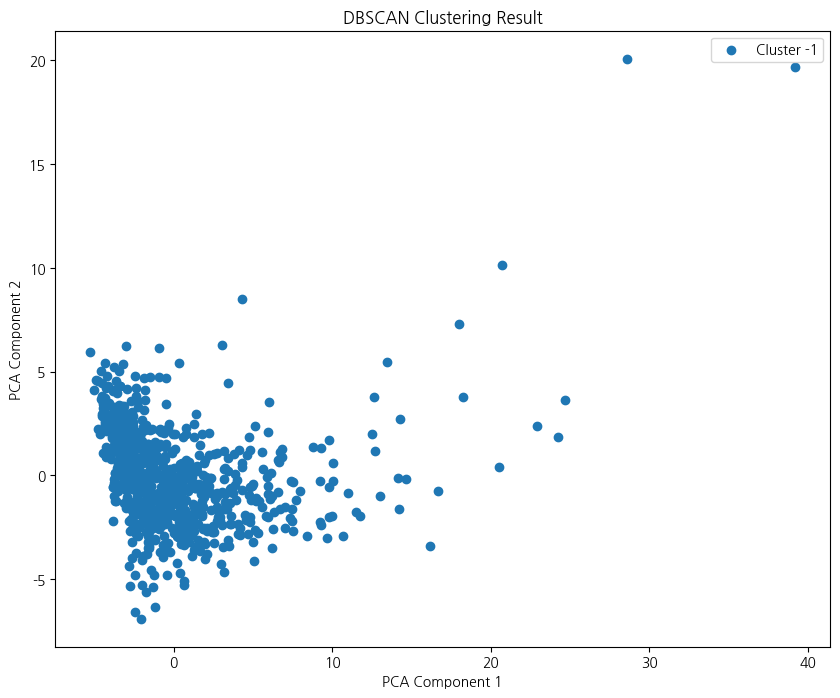

In [ ]:
# DBSCAN 실행 (eps, min_samples 값 조정)
dbscan_model = DBSCAN(eps=1.5, min_samples=5)
df_scaled_dbscan = df_scaled.copy()
df_scaled_dbscan['Cluster_DBSCAN'] = dbscan_model.fit_predict(df_scaled_dbscan.drop(columns=['PCA1', 'PCA2']))

# 클러스터 개수 및 이상치 확인 (-1은 이상치)
print("DBSCAN 클러스터 개수:", df_scaled_dbscan['Cluster_DBSCAN'].nunique())
print(df_scaled_dbscan['Cluster_DBSCAN'].value_counts())

# DBSCAN 클러스터링 결과 시각화
plt.figure(figsize=(10, 8))
for cluster in df_scaled_dbscan['Cluster_DBSCAN'].unique():
    cluster_data = df_scaled_dbscan[df_scaled_dbscan['Cluster_DBSCAN'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Result')
plt.legend()
plt.show()


In [ ]:
# eps 값 튜닝
for eps in range(5, 11, 1):
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(df_scaled.drop(columns=['PCA1', 'PCA2']))
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # -1은 이상치 제외
    print(f"eps={eps}, 클러스터 개수={n_clusters}")


eps=5, 클러스터 개수=5
eps=6, 클러스터 개수=1
eps=7, 클러스터 개수=3
eps=8, 클러스터 개수=1
eps=9, 클러스터 개수=1
eps=10, 클러스터 개수=1


In [ ]:
# min_samples 값 튜닝
# 변수 : 칼럼 * 2 (더미변수는 1개로 인식 : (64 - 18 - 11)  * 2 = 70)
for min_sample in range(1, 11, 1):
    dbscan_test = DBSCAN(eps=7.0, min_samples=min_sample)
    labels = dbscan_test.fit_predict(df_scaled.drop(columns=['PCA1', 'PCA2']))
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"min_samples={min_sample}, 클러스터 개수={n_clusters}")


min_samples=1, 클러스터 개수=133
min_samples=2, 클러스터 개수=6
min_samples=3, 클러스터 개수=3
min_samples=4, 클러스터 개수=2
min_samples=5, 클러스터 개수=1
min_samples=6, 클러스터 개수=1
min_samples=7, 클러스터 개수=1
min_samples=8, 클러스터 개수=1
min_samples=9, 클러스터 개수=1
min_samples=10, 클러스터 개수=1


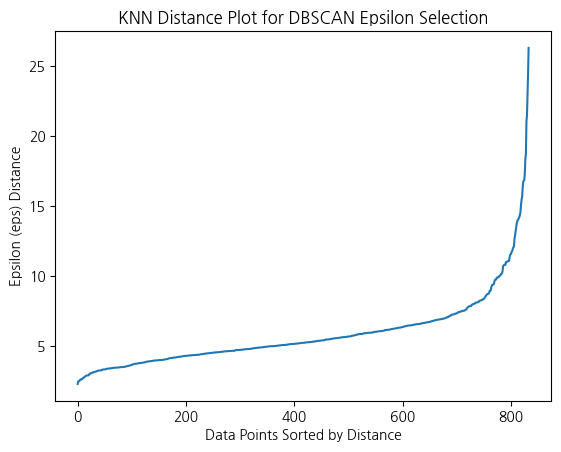

In [ ]:
# KNN을 활용한 eps 최적화
neighbors = NearestNeighbors(n_neighbors=3)  # min_samples 값에 맞춰 설정
neighbors_fit = neighbors.fit(df_scaled.drop(columns=['PCA1', 'PCA2'])) # PCA 컬럼 제외 후 학습
distances, indices = neighbors_fit.kneighbors(df_scaled.drop(columns=['PCA1', 'PCA2']))

# K-근접 이웃 거리 정렬 후 시각화
distances = np.sort(distances[:, -1])  # min_samples번째 이웃까지의 거리 정렬
plt.plot(distances)
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel("Epsilon (eps) Distance")
plt.title("KNN Distance Plot for DBSCAN Epsilon Selection")
plt.show()


## 군집 분석 결과

In [ ]:
## 내부망에서 tools 패키기 사용 불가하여 대체 코드 작성 필요

# 이상치 제거 후 클러스터 특징 분석
cluster_sumarry_filtered = df_scaled.groupby('Cluster').mean()
tools.diplay_dataframe_to_user(name="Cluster Analysis Summary(Outlier Removal)", dataframe = cluster_summary_filtered)


array([[ 0.97996259, -0.42609891,  1.55936878, ..., -0.3647623 ,
        -0.32820784, -0.43937883],
       [-1.54217807, -0.42609891,  0.6635383 , ..., -0.22027966,
        -0.32820784, -0.43937883],
       [ 1.05202375,  2.34687292,  0.6635383 , ..., -0.22027966,
         2.46631136, -0.43937883],
       ...,
       [ 0.04316749, -0.42609891, -1.12812265, ..., -0.07579702,
        -0.32820784, -0.39226212],
       [ 1.26820724, -0.42609891,  1.55936878, ..., -0.3647623 ,
        -0.32820784,  5.71720397],
       [-1.25393342, -0.42609891,  0.6635383 , ...,  0.35765091,
        -0.32820784, -0.43937883]])

## 군집 데이터 저장